# HW7 (total points 6)

# Use pandas API to finish problem in this notebook.

https://pandas.pydata.org/pandas-docs/stable/reference/index.html

Total points 6

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import os
import glob
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
#you may want to import some other modules here such as seaborn or matplotlib

In [2]:
from io import BytesIO
from zipfile import ZipFile
import requests

**Let download movie lense dataset [MovieLens](https://grouplens.org/datasets/movielens/) and extract zip file using various python packages**

http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [3]:
r = requests.get("http://files.grouplens.org/datasets/movielens/ml-latest-small.zip")
print(r.status_code)
zipfile = ZipFile(BytesIO(r.content))

200


In [4]:
zipfile.extractall()

In [5]:
# !ls ml-latest-small/ ## ORIGINAL DID NOT WORK, USING OS & GLOB
for i in glob.glob('ml-latest-small/*.csv'):
    print(i)

ml-latest-small\links.csv
ml-latest-small\movies.csv
ml-latest-small\ratings.csv
ml-latest-small\tags.csv


In [6]:
# ! head  ./ml-latest-small/movies.csv

**It is a csv file.** We can use pandas read_csv to read this file into pandas DataFrame

In [7]:
# lets read movies.csv file
movie = pd.read_csv('./ml-latest-small/movies.csv')

movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Q1 (.25 point) Check if any of the columns are null

In [8]:
# write pandas code here
for i in movie:
    print('{}: {} null values'.format(i, len(movie[movie[i].isna()])))

movieId: 0 null values
title: 0 null values
genres: 0 null values


# Q 2 (.25 point) Check datatype of each of the columns

In [9]:
# write pandas code here
movie.dtypes

movieId     int64
title      object
genres     object
dtype: object

# Q3 (.5 point) Using *str* on series genres, build following  unique_genre set. It should contain all the unique genres from genres column. Print unique genres too.



In [10]:
# write pandas code here
unique_genre = pd.unique(movie["genres"].str.split("|", expand=True).stack())

# Q 4 (1 point) Build columns for different genres with value True or False based on whether a genre is present or not in an observation?



In [11]:
# write pandas code here
for i in unique_genre:
    movie[i] = False
    for ind in range(len(movie)):
        if i in movie['genres'][ind]:
            movie[i][ind] = True

# Q5(1 point) Build a "year" column in movie data frame. The title "year" should be embedded in title columns.

Python regular expression  package **re** is very useful tool for text data handling.  This excercise is a very primitive use of it.


note
- . mean any character
- *. means "0 or more instances of the preceding regex token
- \[ matches a literal [ character
- [A-Za-z0-9] digits and lower, upper case, I think same as \w+
- '+' matches one more more times
- \d Matches any decimal digit

In [12]:
# write pandas code here
movie['year'] = movie['title'].str[-6:]
movie['year'] = movie['year'].str.split('(', expand = True)[1].str.split(')', expand = True)[0]

In [13]:
fix = movie[movie['year'].isna()]
movie = movie[~movie['year'].isna()]

In [14]:
fix['year'] = fix['title'].str[-6:]
num = [str(i) for i in range(0,10)]
fix['year'] = np.where(fix['year'].str[0]=='–', fix['year'].str[1:5], fix['year'])
fix['year'] = np.where(fix['year'].str[0].isin(num), fix['year'].str[:4], np.nan)

In [15]:
movie = movie.append(fix)
movie['count'] = 1


# Q6.(.5 point) Using seaborn, plot a bar plot of average number of movies per year. Do you see any trend?

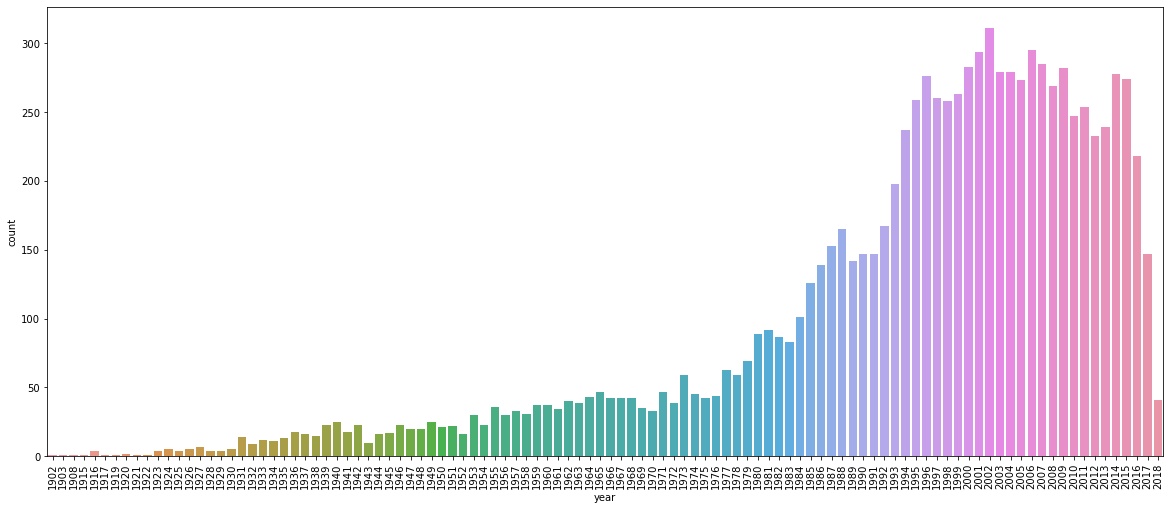

In [16]:
# write code here.
from matplotlib import pyplot

viz = movie[~movie['year'].isna()]
viz['year'] = viz['year'].astype('str')
viz = viz.sort_values(by = ['year'], ascending = True)

viz = viz.groupby(['year'])[['count']].sum().reset_index()
a4_dims = (20, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.barplot(x = 'year',y = 'count',data = viz)
plt.xticks(rotation=90)
plt.show()
# More movies were made recently

# Q7.(1 point) Using matplotlib, plot total number of movies (cumulative over all the years) for each genre.  Your plot should have proper title, axis labels and legends. 

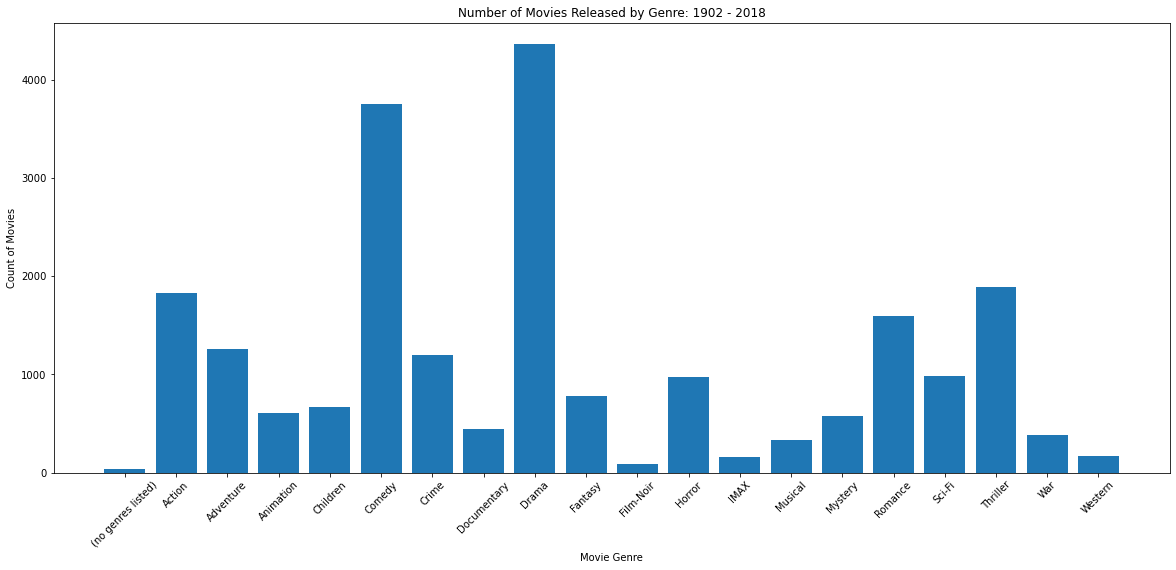

In [17]:
df = movie.copy()
df = df.replace(True, 1)
df = df.replace(False, 0)
df = pd.melt(df, value_vars = unique_genre, value_name = 'count',var_name = 'genre')
df = df.groupby(['genre'])[['count']].sum().reset_index()
fig, ax = pyplot.subplots(figsize=a4_dims)
plt.bar(df['genre'], df['count'])
plt.xlabel('Movie Genre')
plt.ylabel('Count of Movies')
plt.title('Number of Movies Released by Genre: 1902 - 2018')
plt.xticks(rotation = 45)
plt.show()

# Q 8 (.5 point) Build a *movie_title* column containing  the title of the movie. (It should not contain year). Drop the original *title* columns. Display final movie dataFrame.

In [18]:
 # write pandas code here
movie['year'] = movie['year'].fillna('NOT')
def movietitle(df):
    if df['year'] == 'NOT':
        return df['title']
    elif df['title'][-6:][0] == '–':
        return df['title'][:-11]
    else:
        return df['title'][:-6]

movie['movie_title'] = movie.apply(movietitle, axis = 1)
movie['year'] = movie['year'].replace('NOT',np.nan)
del movie['title']
movie

,movieId,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),year,count,movie_title
0,1,Adventure|Animation|Children|Comedy|Fantasy,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1995,1,Toy Story
1,2,Adventure|Children|Fantasy,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1995,1,Jumanji
2,3,Comedy|Romance,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1995,1,Grumpier Old Men
3,4,Comedy|Drama|Romance,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,1995,1,Waiting to Exhale
4,5,Comedy,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1995,1,Father of the Bride Part II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9514,171495,(no genres listed),False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,NaN,1,Cosmos
9515,171631,(no genres listed),False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,NaN,1,Maria Bamford: Old Baby
9518,171749,(no genres listed),False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,2007,1,Death Note: Desu nôto
9525,171891,(no genres listed),False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,NaN,1,Generation Iron 2


# Q 9(1 point) Using seaborn, plot average number of words in a movie name over the years in different genres. You may choose to make separate plots for each genre or to make a single color coded plot as a function of years. All plots should have proper title, axis labels and legends. Write your observation in no more than 2 lines.

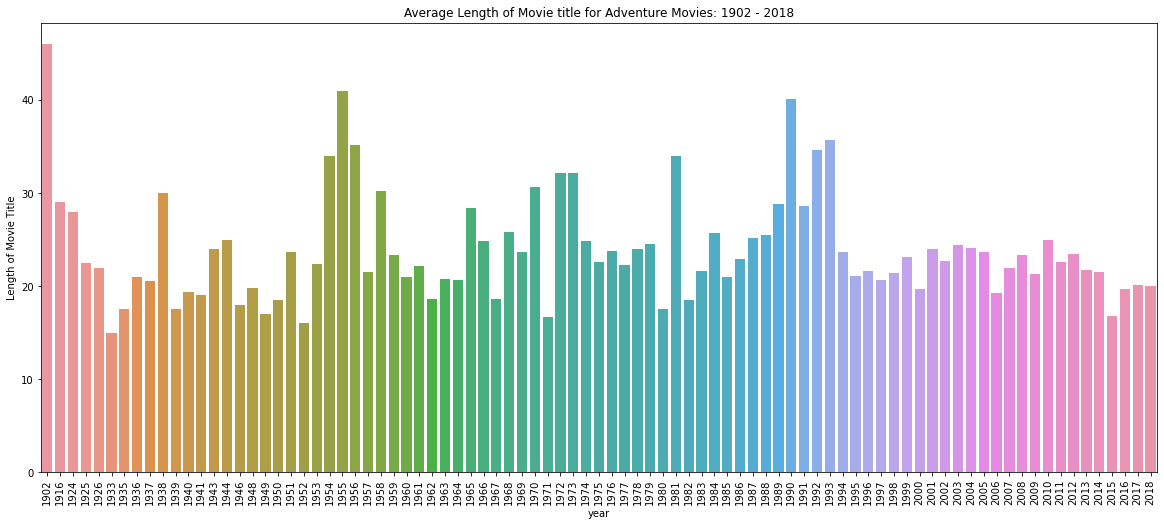

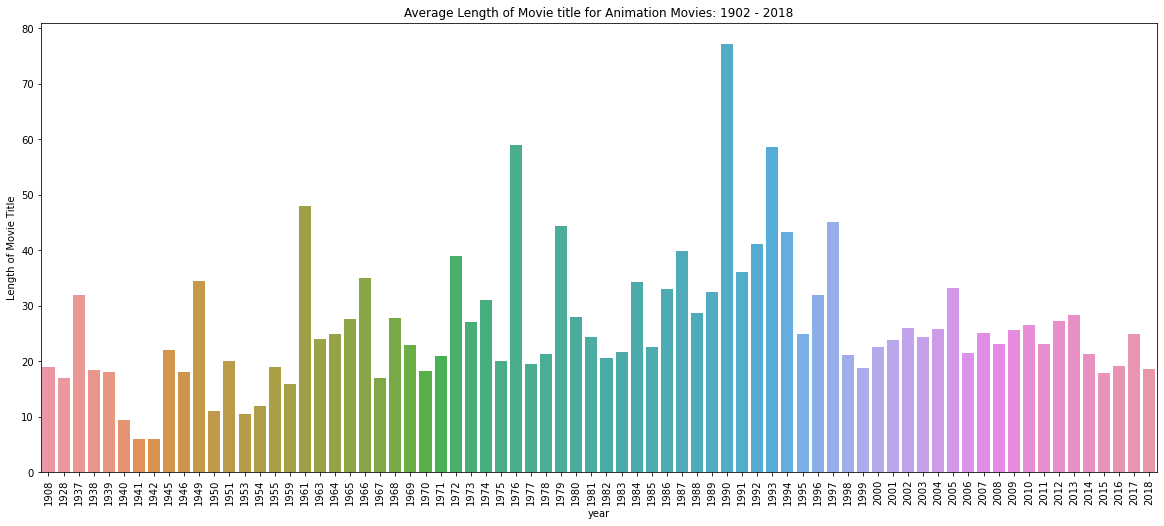

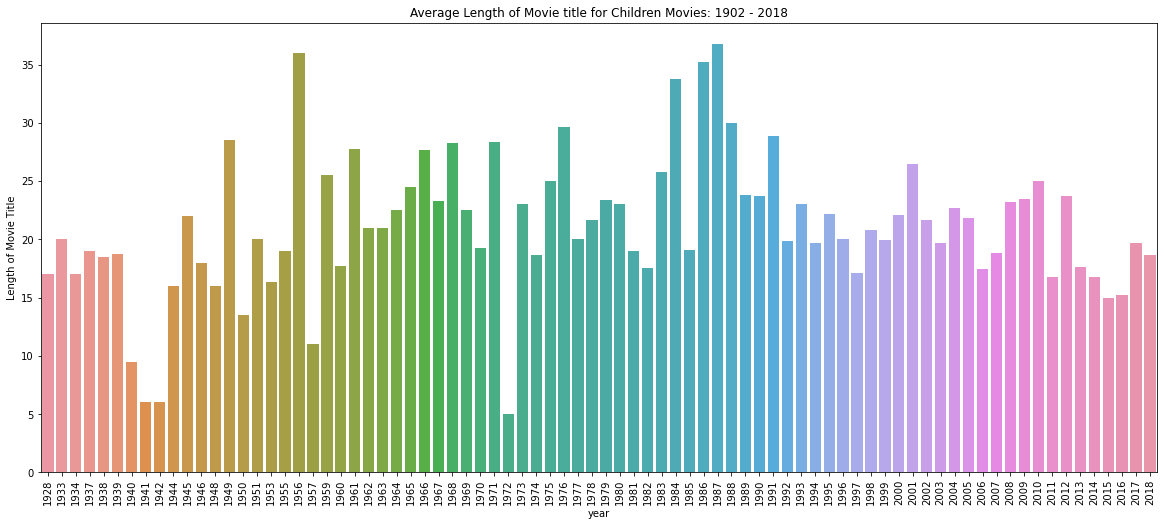

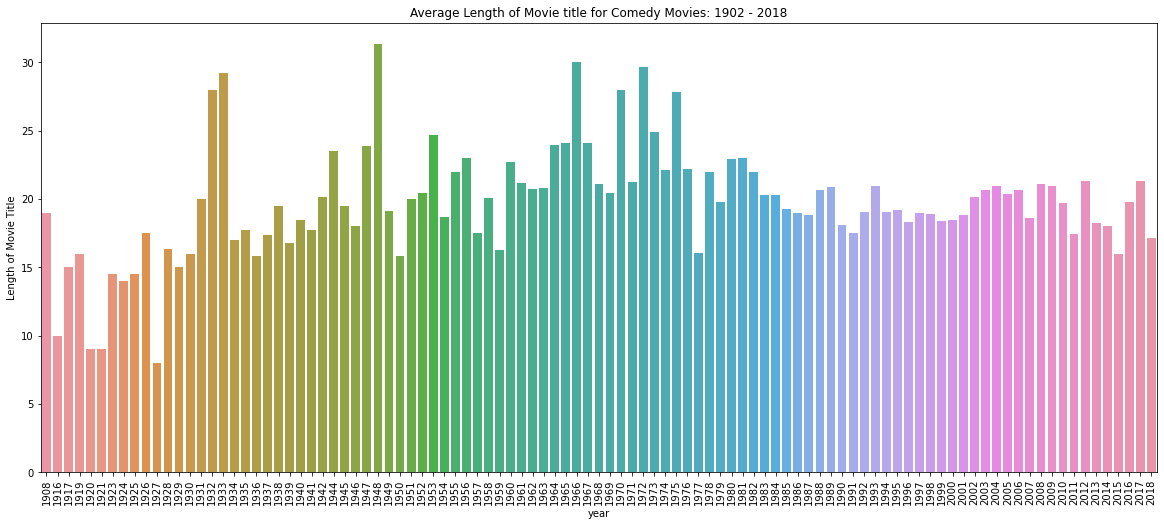

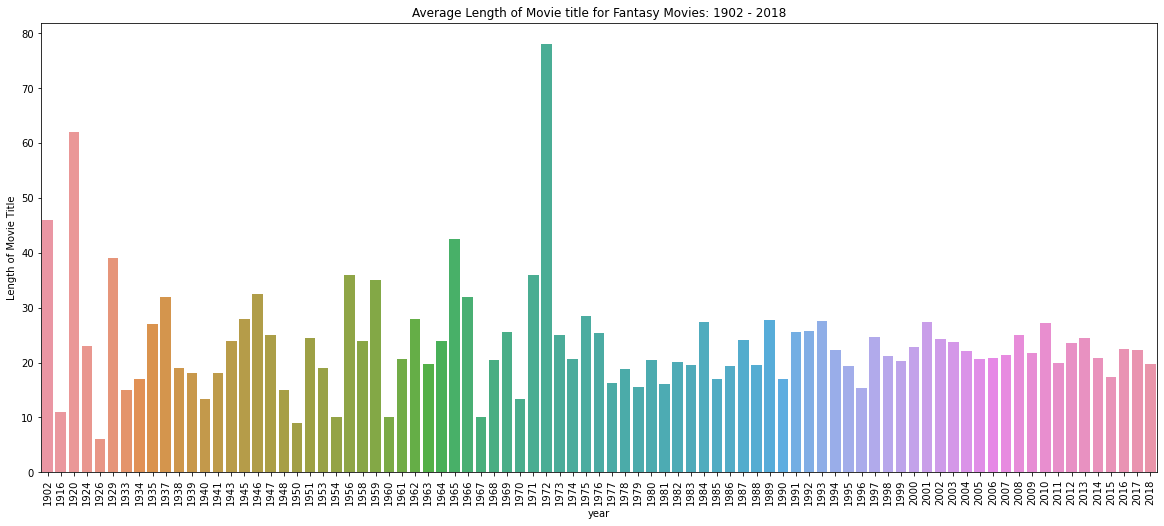

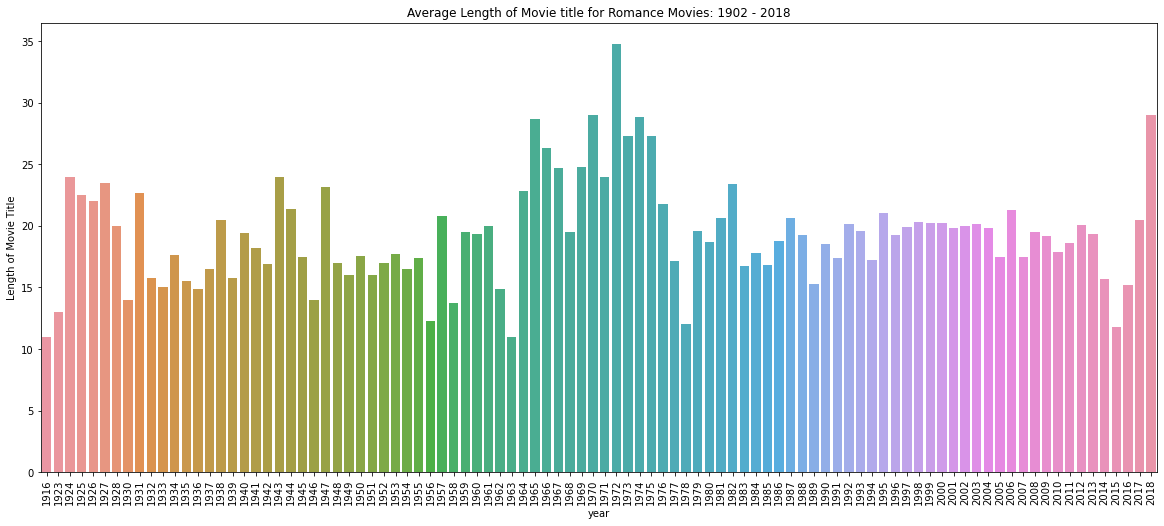

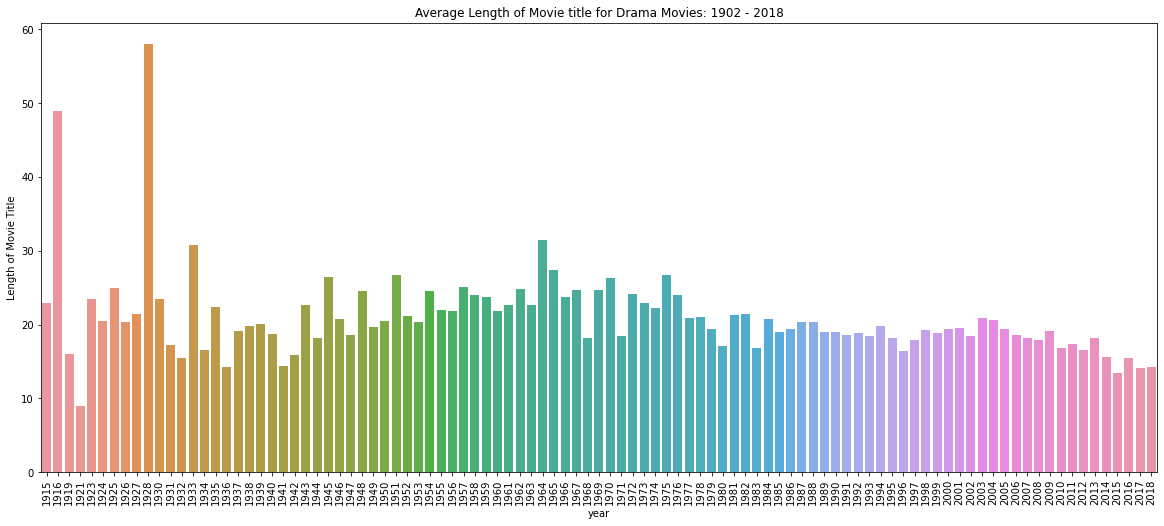

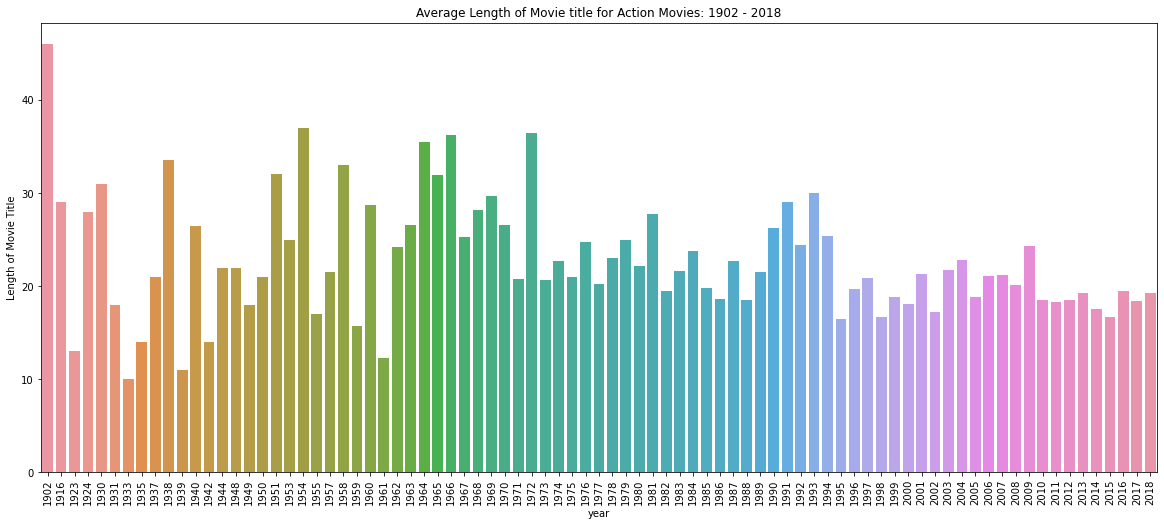

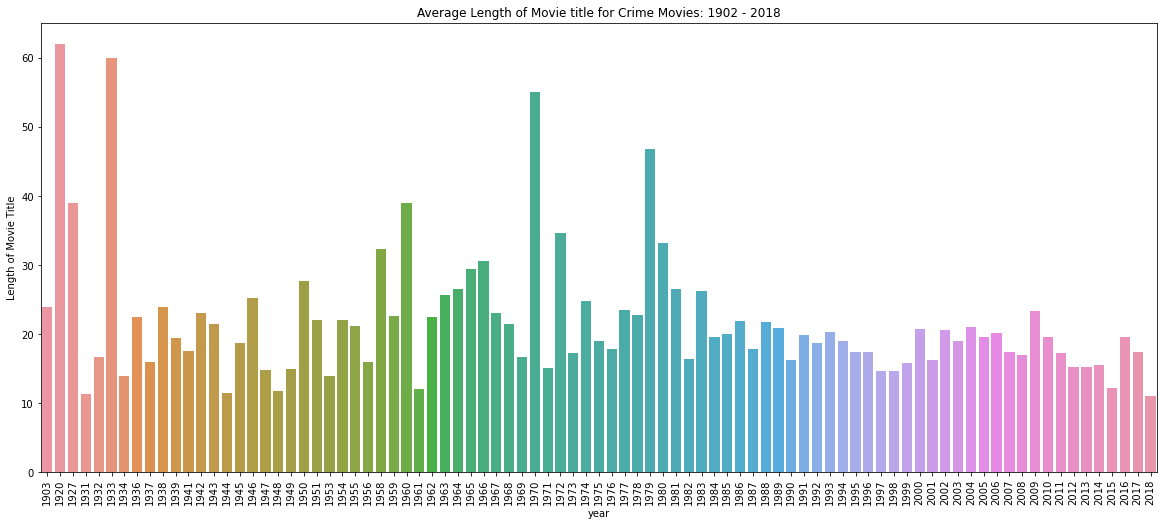

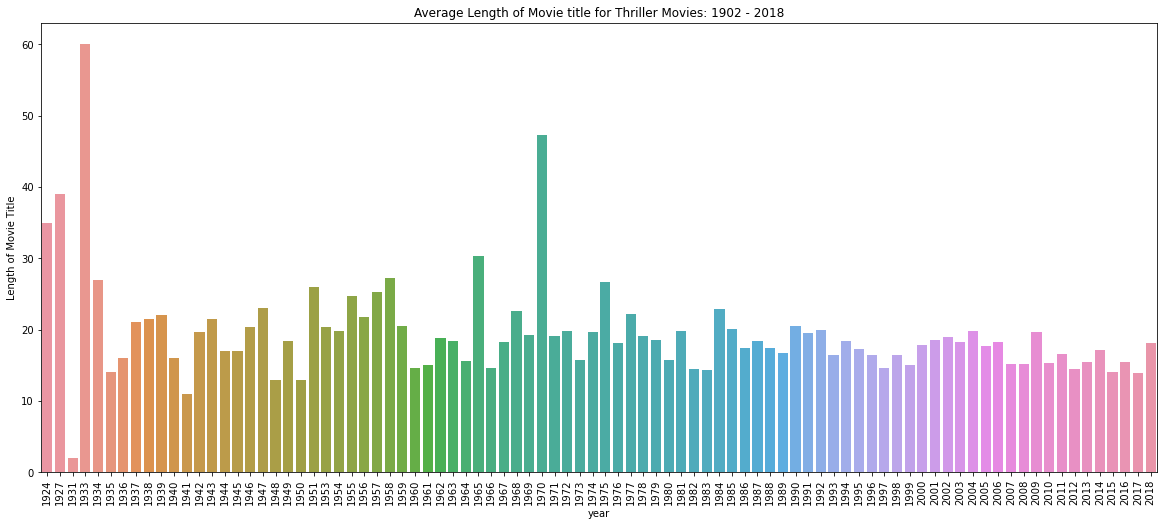

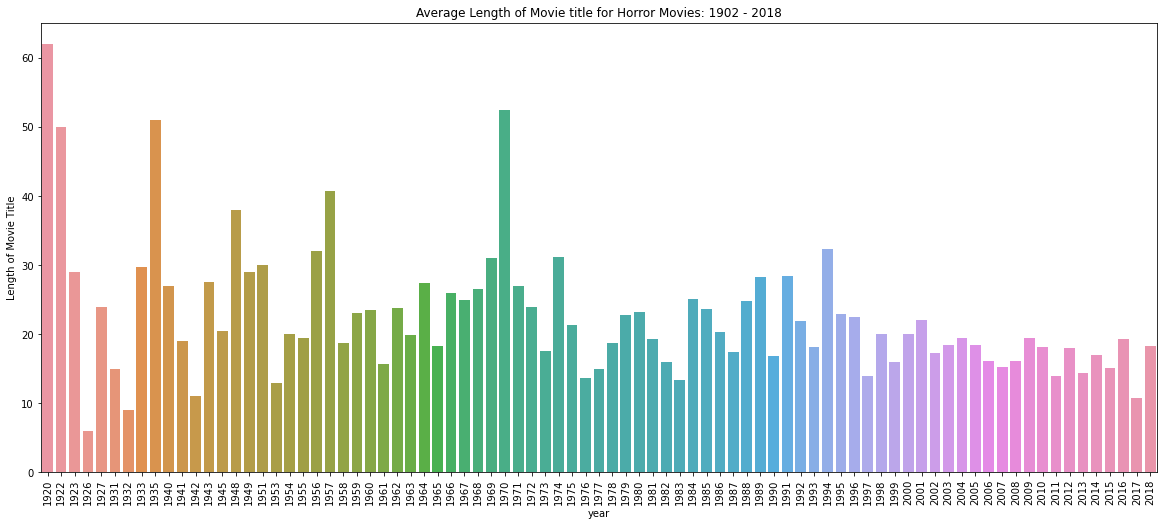

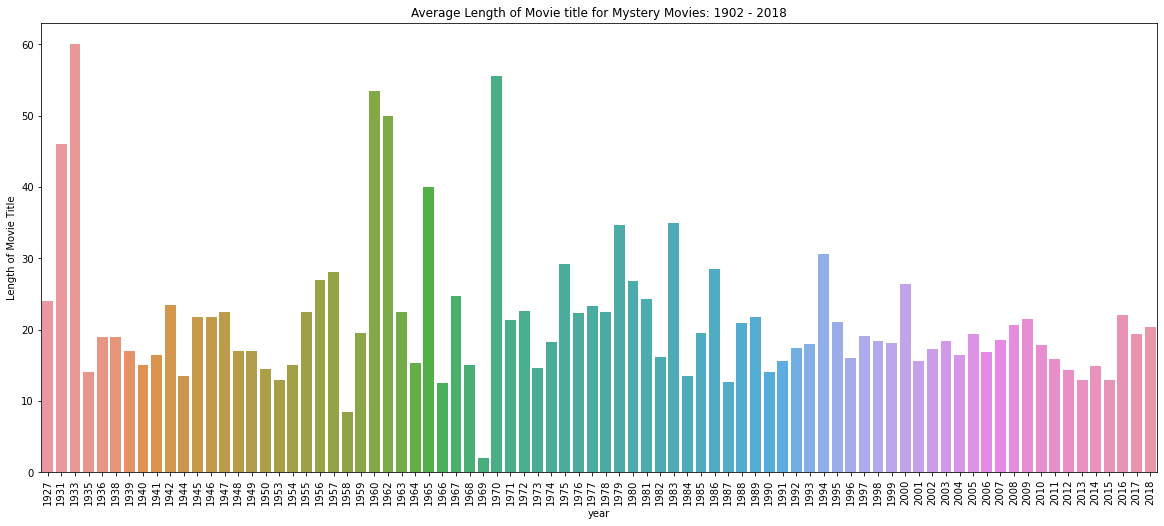

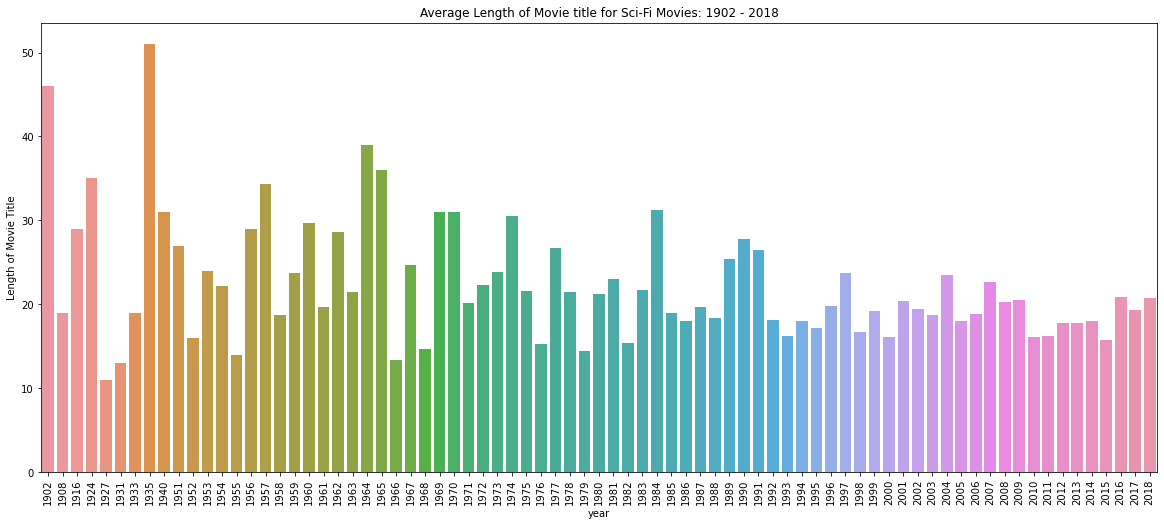

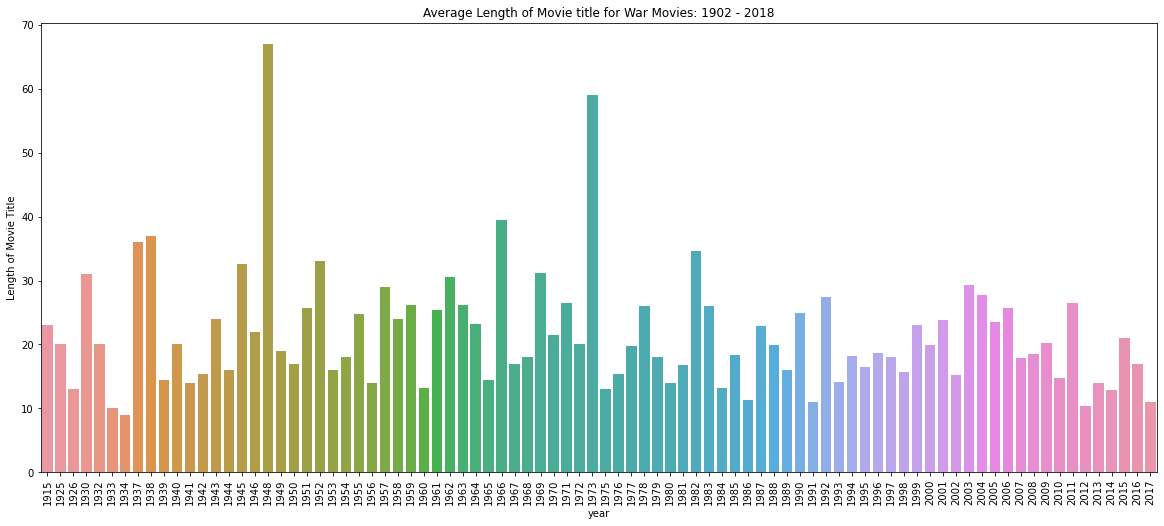

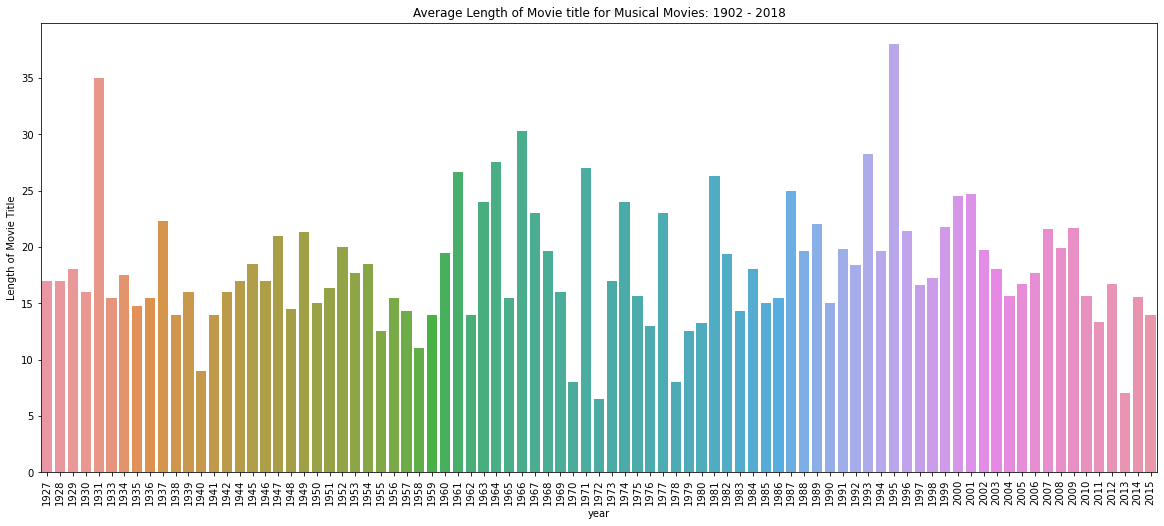

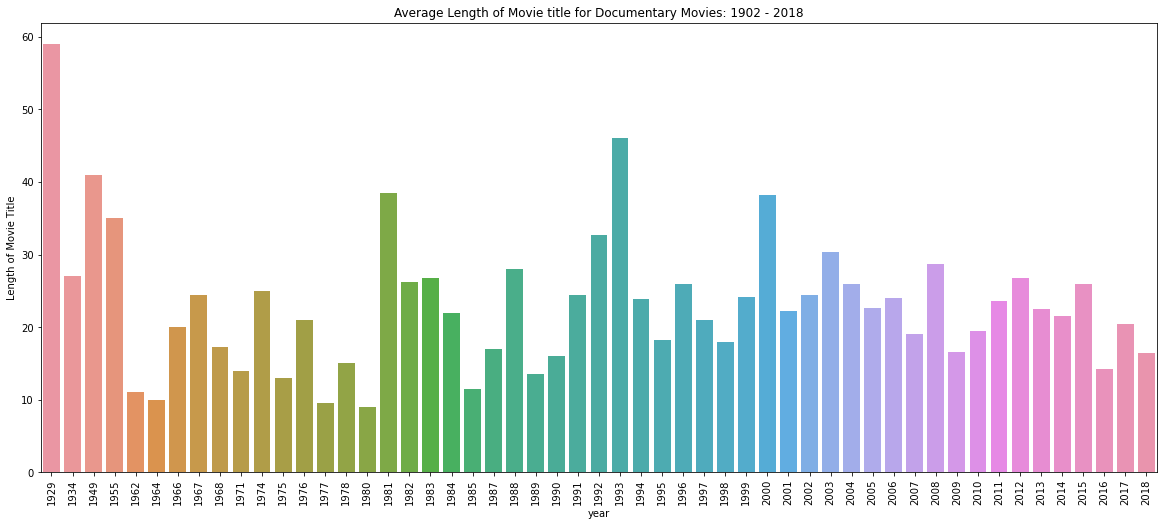

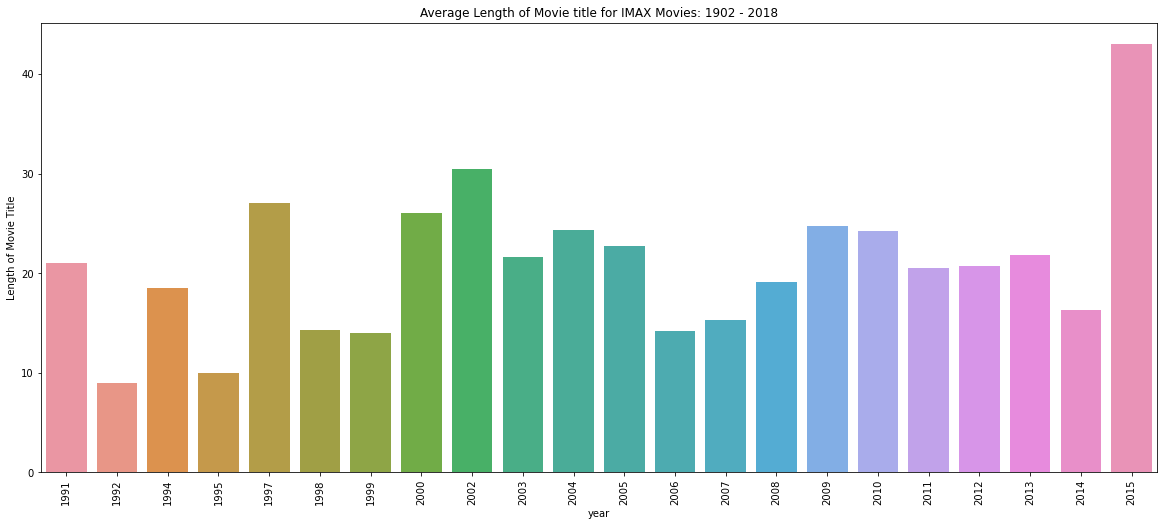

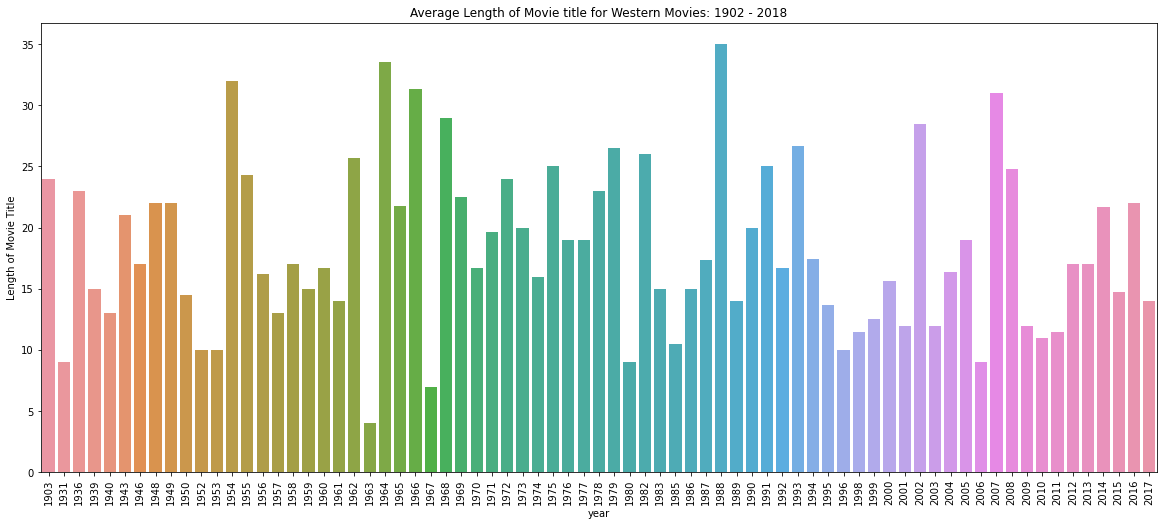

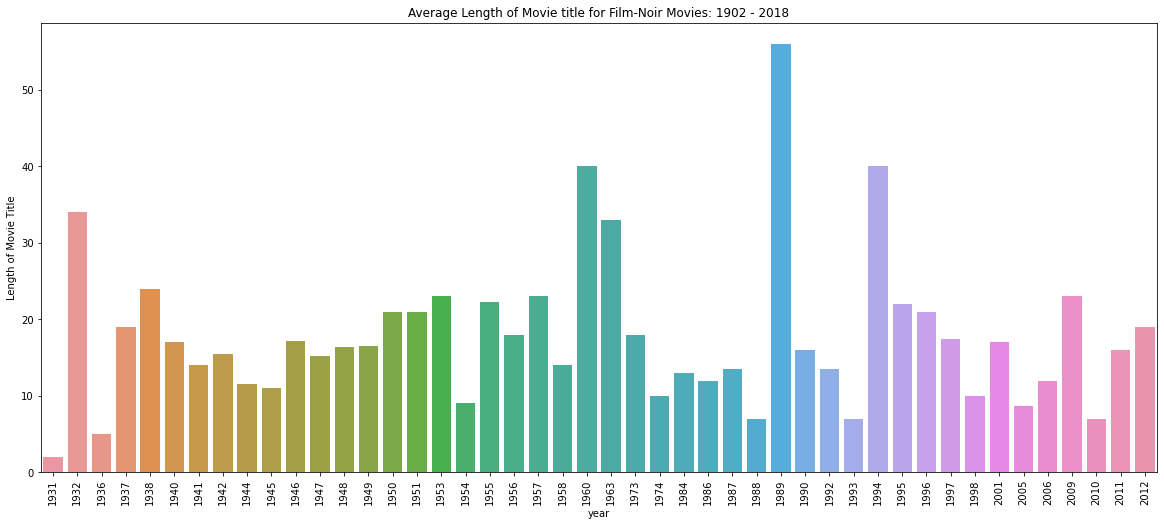

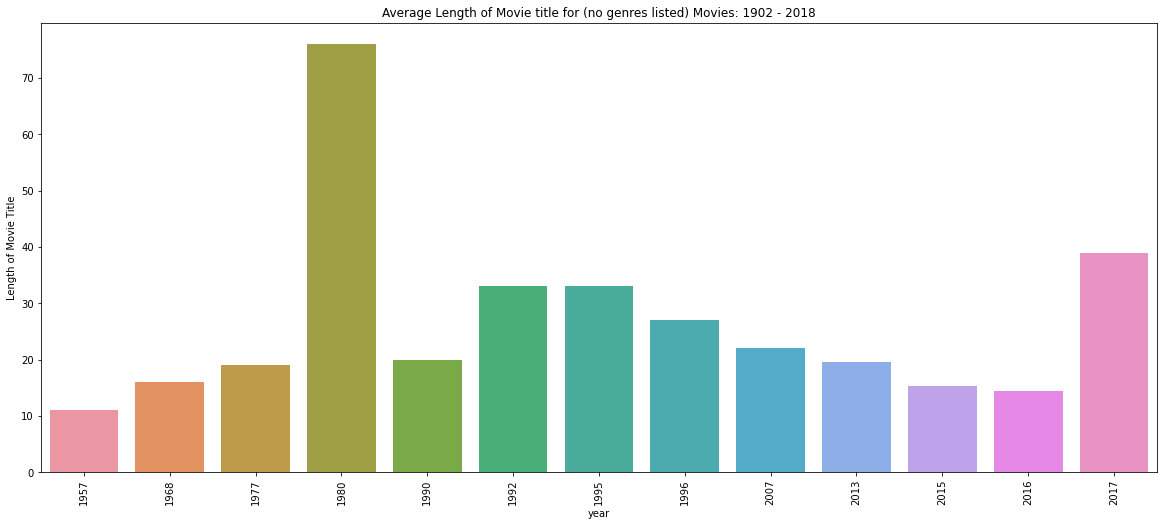

In [19]:
# Write your code here.
movie['length'] = movie['movie_title'].str.len()
df_length = movie.copy()
df_length = df_length[~df_length['year'].isna()]
for genre in unique_genre:
    test = df_length[df_length[genre]==True]
    test = test.groupby(['year'])[['length']].mean().reset_index()
    a4_dims = (20, 8.27)
    fig, ax = pyplot.subplots(figsize=a4_dims)
    sns.barplot(x = 'year',y = 'length',data = test)
    plt.xticks(rotation=90)
    plt.ylabel('Length of Movie Title')
    plt.title('Average Length of Movie title for {} Movies: 1902 - 2018'.format(genre))
    plt.show()
